<a href="https://colab.research.google.com/github/piriram/SummerDeepLearningStudy/blob/main/4%E1%84%8C%E1%85%AE%E1%84%8E%E1%85%A1_%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8_%E1%84%91%E1%85%AE%E1%86%AF%E1%84%87%E1%85%A5%E1%84%8C%E1%85%A5%E1%86%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

``` python
안녕하세요. "딥러닝 입문 with PyTorch" 4주차 실습입니다😉

이번 시간에는 지난 주에 이어 학습 및 추론과 관련된 다양한 PyTorch 모듈들에 대해 배워보겠습니다.

실습 및 과제 자료는 PyTorch 공식 문서를 기반으로 합니다.
PyTorch를 사용할 때 막히는 부분이 있다면 아래의 공식 문서를 먼저 찾아보는 것을 추천드립니다.  

시간상 실습 시간에 다루지 못한 내용들은 과제에 추가로 담아놨습니다.
이번 강의에서 배운 내용들을 모두 외울 필요는 없고, 검색해서 바로 적용할 수 있을 정도면 충분합니다.

```
https://pytorch.org/docs/stable/index.html

In [4]:
# 과제 진행 전에 실행해주세요!

import torch  # torch 모듈 불러오기
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-v0_8-whitegrid'])

In [5]:
torch.cuda.is_available()

True

In [6]:
!nvidia-smi
# !(느낌표)로 시작하는 것은 shell 명령어
# 현재 시스템에서 사용 가능한 NVIDIA GPU에 관한 정보

Sat Sep  9 11:11:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
# 현재 사용 가능한 GPU 개수
print(torch.cuda.device_count())

1


#### Model
https://pytorch.org/docs/stable/torch.html
``` python
딥러닝 모델들은 정해진 순서대로 차곡차곡 쌓인 계층들의 조합으로 이뤄져 있습니다.

PyTorch에는 다양한 계층들이 미리 구현되어 있기 때문에, 직접 계층들을 쌓아 모델을 구현하기 매우 편리합니다.

모델의 기본 요소가 되는 모듈에 대해 배워보고, 직접 Custom 모델을 만들어봅시다.

'nn.Module'
  - parameters, named_parameters
  - to
  - apply
  - nn.sequential, nn.ModuleList, nn.ModuleDict
  - get_submodule, get_parameter

'Build Custom Models'
```

##### nn.Module

https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module

https://pytorch.org/docs/stable/_modules/torch/nn/modules/module.html#Module

``` python
모든 신경망 모듈이 꼭 상속받아야 하는 기본 클래스입니다.
모듈은 다른 모듈을 포함할 수 있으며, 여러 모듈이 합쳐진 것도 하나의 새로운 모듈이 됩니다.

딥러닝 모델 역시 여러 모듈이 합쳐져서 만들어진 것으로, nn.Module을 상속받아야 합니다.
nn.Module에 대해 더 자세히 알아봅시다.  
```

In [8]:
# 실습에 활용할 임의의 신경망 모델을 하나 정의하겠습니다.

class DeepModel(nn.Module):
  # 딥러닝 모델을 구성하는 필수 함수 -> init,forward 함수
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(3, 16)
        self.linear2 = nn.Linear(16, 30)
        self.linear3 = nn.Linear(30,2)

        self.dropout = nn.Dropout(0.4)

    def forward(self, x):
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.dropout(x)
        x = self.linear3(x)
        return x

In [9]:
model = DeepModel()
print(model)
# 3개의 계층으로 이루어짐을 알 수 있다.

DeepModel(
  (linear1): Linear(in_features=3, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=30, bias=True)
  (linear3): Linear(in_features=30, out_features=2, bias=True)
  (dropout): Dropout(p=0.4, inplace=False)
)


In [10]:
x = torch.rand(3)

forward_result = model.forward(x)
print(forward_result)

tensor([ 0.1539, -0.0151], grad_fn=<AddBackward0>)


###### parameters, named_parameters
``` python
모델의 파라미터에 접근할 때 사용합니다
```

In [11]:
for param in model.parameters():
  # 모델이 커지면 어떤 계층의 가중치인지 알기 어려움 -> named_parameters를 사용함
    print(param.shape)
    print(param)

torch.Size([16, 3])
Parameter containing:
tensor([[-0.2102, -0.2276,  0.4416],
        [ 0.0466, -0.4314, -0.0950],
        [ 0.3052, -0.1757, -0.4819],
        [ 0.1445,  0.4885,  0.1244],
        [ 0.3888,  0.0180, -0.4259],
        [-0.3361,  0.5679, -0.2676],
        [-0.2703, -0.3174,  0.1746],
        [ 0.2518,  0.0249, -0.3054],
        [-0.5518, -0.1479,  0.3883],
        [-0.5702,  0.4991,  0.3717],
        [ 0.4640, -0.1168,  0.1347],
        [-0.3519, -0.5586,  0.0384],
        [-0.2985,  0.4885,  0.0717],
        [ 0.1855,  0.0376,  0.5448],
        [ 0.3393,  0.0399, -0.5738],
        [ 0.1246, -0.4166,  0.1362]], requires_grad=True)
torch.Size([16])
Parameter containing:
tensor([ 0.2077, -0.2923, -0.4929, -0.3834, -0.1197,  0.1882,  0.2159, -0.1092,
         0.3577, -0.4323, -0.0486,  0.5553, -0.2805,  0.3957, -0.2908,  0.2773],
       requires_grad=True)
torch.Size([30, 16])
Parameter containing:
tensor([[-2.4854e-01,  2.4238e-01, -1.2251e-01, -2.3945e-02,  7.3297e-03,
 

In [12]:
for name, param in model.named_parameters(): # 가중치와 편향치를 각각 나타냄
    print(name, param.shape)

linear1.weight torch.Size([16, 3])
linear1.bias torch.Size([16])
linear2.weight torch.Size([30, 16])
linear2.bias torch.Size([30])
linear3.weight torch.Size([2, 30])
linear3.bias torch.Size([2])


###### to
``` python
모델을 장치에 저장할 때 사용합니다

model.to(device)를 해주면, GPU에 해당 모델이 복사되어 저장됩니다.
```

In [13]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
print(device)

cuda


In [14]:
model_gpu = model.to(device)

###### apply
``` python
모듈에 특정 함수를 적용해줄 때 사용합니다.
```

In [15]:
def weights_init(module):
    print(module)
    for param in module.parameters():
      # 파라미터를 0으로 초기화해주는 함수
        param.data = torch.zeros_like(param.data)
        print(param.data)

In [16]:
for module in model.modules():
    module.apply(weights_init)

Linear(in_features=3, out_features=16, bias=True)
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')
Linear(in_features=16, out_features=30, bias=True)
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

###### nn.sequential, nn.ModuleList, nn.ModuleDict
``` python
세 모델의 공통점 -> 여러 모듈을 묶어주는 것

PyTorch에는 여러 모듈들을 한 번에 묶어주는 다양한 방법이 존재합니다.

하나씩 살펴보고 사용법과 차이점에 대해 알아봅시다
```

In [17]:
''' nn.Sequential '''
# 반복되는 계층이 많은 모델을 구현할 때 주로 사용합니다.
# 입력 순서가 정의한 계층을 순서대로 통과하며 결과를 반환합니다.

nn_sequential = nn.Sequential(nn.Linear(3,4),
                              nn.Linear(4,10),
                              nn.Softmax(),
                              nn.Linear(10,2),
                              nn.ReLU()
                              )
# 인자로 여러 모델과 파라미터를 넣어서 실행
# 모델 통과 순서 Linear -> linear -> softmax->linear->렐루
print(nn_sequential)

a = torch.rand(3)
sequential_result = nn_sequential(a)
print(sequential_result)

Sequential(
  (0): Linear(in_features=3, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=10, bias=True)
  (2): Softmax(dim=None)
  (3): Linear(in_features=10, out_features=2, bias=True)
  (4): ReLU()
)
tensor([0.0407, 0.0551], grad_fn=<ReluBackward0>)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [18]:
''' nn.ModuleList & nn.ModuleDict '''
# 모델을 저장하는데 특화 -> 리스트,딕트
# 모듈들을 특정한 데이터 구조(List, Dict)에 그냥 저장할 수는 없습니다
# 모듈을 리스트나 딕셔너리 타입에 넣어서 활용하려면 반드시 nn.ModuleList, nn.ModuleDict를 사용합시다.

Linear_modulelist = nn.ModuleList([nn.Linear(3,4),
                                   nn.Linear(4,10),
                                   nn.Linear(10,2),
                                  ])

Activation_moduledict = nn.ModuleDict({'Relu' : nn.ReLU(),
                                       'Softmax' : nn.Softmax(),
                                       'Sigmoid' : nn.Sigmoid()
                                      })
print(Linear_modulelist)
print(Activation_moduledict)

ModuleList(
  (0): Linear(in_features=3, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=2, bias=True)
)
ModuleDict(
  (Relu): ReLU()
  (Softmax): Softmax(dim=None)
  (Sigmoid): Sigmoid()
)


In [45]:
Linear_modulelist[1]

Linear(in_features=4, out_features=10, bias=True)

In [19]:
for module in Linear_modulelist:
    print(module)

Linear(in_features=3, out_features=4, bias=True)
Linear(in_features=4, out_features=10, bias=True)
Linear(in_features=10, out_features=2, bias=True)


In [20]:
print(Activation_moduledict['Relu'])
print(Activation_moduledict['Softmax'])
print(Activation_moduledict['Sigmoid'])

ReLU()
Softmax(dim=None)
Sigmoid()


###### get_submodule, get_parameter
``` python
모델에서 특정 모듈이나 파라미터 값을 가져올 때 사용합니다.
```

In [21]:
print(model)

DeepModel(
  (linear1): Linear(in_features=3, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=30, bias=True)
  (linear3): Linear(in_features=30, out_features=2, bias=True)
  (dropout): Dropout(p=0.4, inplace=False)
)


In [22]:
model.get_submodule('dropout')

Dropout(p=0.4, inplace=False)

In [23]:
model.get_parameter('linear1.bias')

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0', requires_grad=True)

##### Build Custom Models

In [24]:
# 모든 신경망 네트워크의 기초가 되는 클래스

class BaseModel(nn.Module):

    def __init__(self):
        """
        모델에서 활용할 계층들을 미리 정의해주는 함수
        """
        raise NotImplementedError

    def forward(self, *inputs):
        """
        순전파를 구현하는 함수

        :return: 순전파 결과
        """
        raise NotImplementedError

    def __str__(self):  # print(model) 하면 아래의 정보가 반환
        """
        모델 이름과 학습 가능한 파라미터 수를 같이 반환해주는 함수
        """
        model_parameters = filter(lambda p: p.requires_grad, self.parameters())
        params = sum([np.prod(p.size()) for p in model_parameters])
        return super().__str__() + '\n학습 가능한 파라미터 개수: {}'.format(params)

In [25]:
# 간단한 CNN 모델 구축
# 모델을 쌓아가는 과정을 거쳐서 클래스를 정의
def conv_block(in_channels, out_channels):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, 3, padding=1),
        # 패딩이 없으면 이미지 크기가 계속 줄어듬
        # CNN의 이미지 크기를 보존하려면 커널크기=3,패딩=1을 주어야 한다.
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channels, out_channels, 3, padding=1),
        nn.ReLU(inplace=True)
    )

class SimpleCNN(nn.Module): # 이미지 처리 모델, 채널 1인(gray) 이미지 데이터를 받아 분류하는 모델

    def __init__(self):
        super().__init__()
        self.conv_block1 = conv_block(1,32)
        self.conv_block2 = conv_block(32,64)
        self.conv_block3 = conv_block(64,128)
        self.conv_block4 = conv_block(128,1)

        self.dropout = nn.Dropout(0.4)
        self.maxpool = nn.MaxPool2d(2)
        self.classifier = nn.LazyLinear(10)

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.dropout(x)
        x = self.conv_block2(x)
        x = self.maxpool(x)
        x = self.conv_block3(x)
        x = self.conv_block4(x)
        x = x.view(x.shape[0], -1)
        x = self.classifier(x)
        return x

    def __str__(self):  # print(model) 하면 아래의 정보가 반환
        """
        모델 이름과 학습 가능한 파라미터 수를 같이 반환해주는 함수
        """
        model_parameters = filter(lambda p: p.requires_grad, self.parameters())
        params = sum([np.prod(p.size()) for p in model_parameters])
        return super().__str__() + '\n학습 가능한 파라미터 개수: {}'.format(params)

In [26]:
custom_model = SimpleCNN()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [27]:
print(custom_model)

SimpleCNN(
  (conv_block1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block4): Sequential(
    (0): Conv2d(128, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (dropout): Dropout(p=0.4, inpla

In [28]:
input = torch.rand((1,28, 28))

output = custom_model(input)
output.shape

torch.Size([1, 10])

#### Data
https://pytorch.org/docs/stable/data.html

https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html
``` python
torch.utils.data에는 신경망 학습에 필요한 데이터를 다루기 위해 필요한 다양한 클래스들이 구현되어 있습니다.

그 중 학습에 있어 필수적인 Dataset, DataLoader에 대해 알아보고 커스텀하는 방법에 대해 알아봅시다.

'Dataset'
- torchvision datasets

'DataLoader'

```

##### Dataset
``` python
모델 학습에 필요한 데이터를 가져옵니다.

데이터를 가져오는 방법은 크게 두 가지입니다.

1. __init__ 함수에서 데이터 전부 저장하기
2. 메타 데이터 파일(ex. csv, yaml, json 등)만 정의해놓고 이를 활용해서 불러오기

첫 번째 방법은 속도가 빠르다는 장점이 있지만, 데이터가 너무 많아 올리지 못할 때는 두 번째 방법을 사용합니다.

```

In [29]:
# 모든 데이터 셋의 기초가 되는 클래스

from torch.utils.data import Dataset

class BaseDataset(Dataset):

    def __init__(self, data, transform=None, val=False, test=False):
        """
        필요한 변수들을 선언하거나, 메타 데이터 혹은 데이터 전체를 로드해준다.

        """
        self.data = data
        self.transform = transform
        self.val = val
        self.test = test

        super().__init__()

    def __len__(self):
        """
        데이터의 총 크기를 반환하는 함수

        """
        return(len(self.data))

    def __getitem__(self, index):
        """
        index를 활용해 데이터의 일부를 반환해주는 함수

        :return: data[index] -> 텐서로 반환해야 한다.
        """
        raise NotImplementedError

###### torchvision datasets
https://pytorch.org/vision/main/datasets.html
``` python
컴퓨터 비전 연구 및 프로젝트에 자주 사용되는 여러 데이터 셋을 제공해줍니다.

```

In [30]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",  # 데이터가 저장되는 경로
    train=True,  # 학습 여부
    download=True,  #  root에 데이터가 없으면 인터넷에서 다운로드 함
    transform=ToTensor()  # 데이터 증강
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:00<00:00, 119582230.33it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 7830163.35it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 65081037.45it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7711527.50it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [31]:
image, label = training_data[0]
print(image, image.shape)
print(label)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

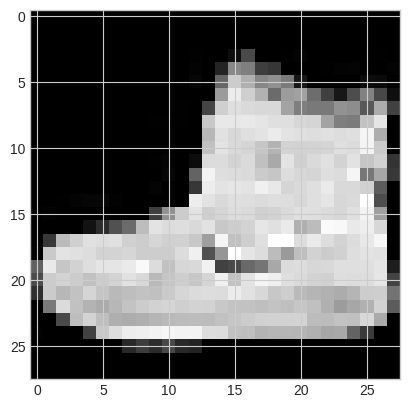

In [32]:
plt.imshow(image.squeeze(), cmap='gray')

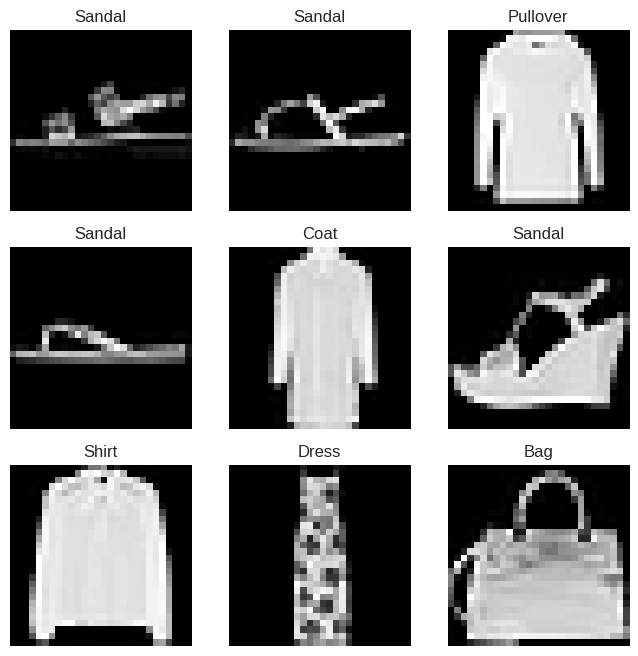

In [33]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

##### DataLoader
``` python
Batch 생성, 데이터 섞기, train & val data split 등을 진행합니다.

앞서 정의한 Dataset을 인자로 받는 것이 특징이며, 매우 다양한 기능을 활용하거나 정의할 수 있습니다.

```

In [34]:
# 모든 데이터 로더의 기초가 되는 클래스

import numpy as np
from torch.utils.data import DataLoader

class BaseDataLoader(DataLoader):

    def __init__(self, dataset_root: str, batch_size, shuffle, num_workers, validation_split):

        self.dataset_root = dataset_root
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.num_workers = num_workers
        self.validation_split = validation_split

        super().__init__()


    def split_validation(self):
        """
        위에서 정의한 _split_sampler를 활용하여 샘플링해주는 함수

        :return: DataLoader(sampler, **self.init_kwargs)
        """
        #return DataLoader(sampler=self.sampler, **self.init_kwargs)


    def _get_dataset(self, dataset_class, dataset_name, transform=None):
        """
        미리 만들어둔 데이터 셋 클래스를 활용하여 데이터 셋을 정의하는 함수

        - dataset_class : 미리 정의해둔 데이터 셋 클래스
        - dataset_name : 데이터 셋 이름(데이터 위치 찾을 때 활용)
        - transform : 데이터에 적용할 transform 종류

        :return: train_dataset, test_dataset
        """

        #return train_dataset, test_dataset


    def get_dataloader(self, batch_size):
        """
        데이터 로더를 정의하는 함수

        :return: trainloader, validationloader, testloader
        """

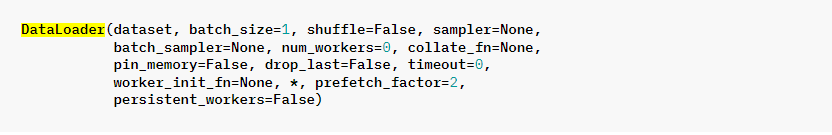

``` python
PyTorch의 Dataloader는 다음과 같은 인자를 입력으로 받습니다.

- dataset : 사용할 데이터 셋
- batch_size : 배치 크기
- shuffle : 매 Epoch마다 데이터 순서 섞을지 말지
- sampler : 데이터 샘플링
- num_workers : 데이터를 GPU로 옮길 때 사용되는 프로세서의 개수. num_workers = batch_size / num_GPU의 공식을 참고하여 설정하는 걸 권장.
- collate_fn : 배치 데이터 크기 일치
- drop_last : 전체 데이터가 배치로 딱 안 떨어질 때 버릴지 말지
```

In [35]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


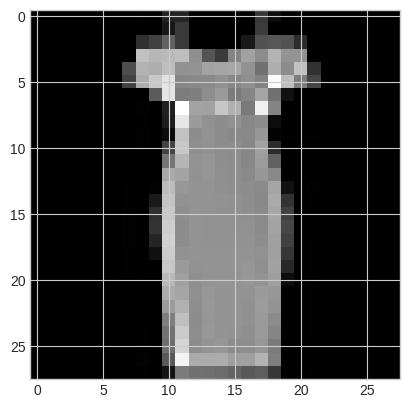

Label: 3


In [36]:
# 이미지와 정답(label)을 표시합니다.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

#### Optimizer & Scheduler
https://pytorch.org/docs/stable/optim.html

``` python
PyTorch에서 제공해주는 Optimizer와 Scheduler의 사용방법을 알아봅시다.

Optimizer : 모델 가중치 업데이트
Scheduler : 한 Epoch마다 학습률을 조정
```

##### Optimizer

In [37]:
print(custom_model)

SimpleCNN(
  (conv_block1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block4): Sequential(
    (0): Conv2d(128, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (dropout): Dropout(p=0.4, inpla

In [38]:
optimizer = torch.optim.SGD(custom_model.parameters() , lr=  0.01)
criterion = nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

In [39]:
from tqdm import tqdm

epochs = 10
total_loss = 0

custom_model.to(device)
custom_model.train()

for epoch in range(epochs):
    print("train for epoch ", epoch)
    for batch, (data, target) in tqdm(enumerate(train_dataloader)):

        # 순전파
        data, target = data.to(device), target.to(device)
        output = custom_model(data)

        # loss 계산 및 역전파
        loss = criterion(output, target)
        total_loss += loss.item()
        loss.backward()

        # 가중치 업데이트
        optimizer.zero_grad()
        optimizer.step()

        # loss 실시간 확인
        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(data)
            print(f"loss: {loss:>7f}  [{current:>5d}/{len(training_data):>5d}]")

    # 학습률 조정
    scheduler.step()

train for epoch  0


8it [00:08,  1.32it/s]

loss: 2.309487  [   64/60000]


114it [00:09, 66.42it/s]

loss: 2.313545  [ 6464/60000]


211it [00:11, 80.84it/s]

loss: 2.320738  [12864/60000]


317it [00:12, 78.84it/s]

loss: 2.306943  [19264/60000]


416it [00:13, 81.19it/s]

loss: 2.312180  [25664/60000]


515it [00:14, 82.22it/s]

loss: 2.303187  [32064/60000]


614it [00:16, 82.39it/s]

loss: 2.302131  [38464/60000]


713it [00:17, 82.25it/s]

loss: 2.331699  [44864/60000]


812it [00:18, 79.89it/s]

loss: 2.290301  [51264/60000]


911it [00:19, 81.73it/s]

loss: 2.337335  [57664/60000]


938it [00:20, 46.45it/s]


train for epoch  1


6it [00:00, 58.08it/s]

loss: 2.306613  [   64/60000]


108it [00:02, 46.77it/s]

loss: 2.325856  [ 6464/60000]


207it [00:04, 50.15it/s]

loss: 2.329845  [12864/60000]


306it [00:06, 56.43it/s]

loss: 2.320004  [19264/60000]


414it [00:08, 64.85it/s]

loss: 2.301760  [25664/60000]


510it [00:09, 71.40it/s]

loss: 2.307357  [32064/60000]


608it [00:11, 56.77it/s]

loss: 2.298608  [38464/60000]


705it [00:13, 30.69it/s]

loss: 2.304396  [44864/60000]


809it [00:15, 77.86it/s]

loss: 2.296480  [51264/60000]


906it [00:16, 62.52it/s]

loss: 2.309599  [57664/60000]


938it [00:17, 53.09it/s]


train for epoch  2


5it [00:00, 41.73it/s]

loss: 2.330090  [   64/60000]


112it [00:01, 80.05it/s]

loss: 2.313556  [ 6464/60000]


211it [00:02, 82.28it/s]

loss: 2.301858  [12864/60000]


308it [00:04, 50.77it/s]

loss: 2.309021  [19264/60000]


411it [00:06, 71.40it/s]

loss: 2.305131  [25664/60000]


512it [00:08, 47.73it/s]

loss: 2.321851  [32064/60000]


609it [00:10, 42.53it/s]

loss: 2.302419  [38464/60000]


707it [00:12, 58.03it/s]

loss: 2.306935  [44864/60000]


807it [00:14, 44.87it/s]

loss: 2.311674  [51264/60000]


913it [00:15, 79.73it/s]

loss: 2.298651  [57664/60000]


938it [00:15, 59.00it/s]


train for epoch  3


8it [00:00, 78.25it/s]

loss: 2.315283  [   64/60000]


109it [00:01, 51.04it/s]

loss: 2.302586  [ 6464/60000]


208it [00:03, 54.88it/s]

loss: 2.309530  [12864/60000]


305it [00:05, 46.15it/s]

loss: 2.285368  [19264/60000]


412it [00:07, 77.42it/s]

loss: 2.294280  [25664/60000]


509it [00:08, 79.58it/s]

loss: 2.307950  [32064/60000]


617it [00:10, 81.45it/s]

loss: 2.293688  [38464/60000]


716it [00:11, 81.58it/s]

loss: 2.297812  [44864/60000]


814it [00:12, 70.34it/s]

loss: 2.309905  [51264/60000]


916it [00:14, 69.89it/s]

loss: 2.310586  [57664/60000]


938it [00:14, 65.40it/s]


train for epoch  4


8it [00:00, 73.13it/s]

loss: 2.303858  [   64/60000]


107it [00:01, 81.26it/s]

loss: 2.296171  [ 6464/60000]


209it [00:02, 64.44it/s]

loss: 2.283429  [12864/60000]


312it [00:04, 78.59it/s]

loss: 2.291964  [19264/60000]


414it [00:05, 78.69it/s]

loss: 2.291543  [25664/60000]


510it [00:06, 79.26it/s]

loss: 2.307012  [32064/60000]


609it [00:08, 80.69it/s]

loss: 2.295155  [38464/60000]


717it [00:09, 80.44it/s]

loss: 2.319459  [44864/60000]


816it [00:10, 81.25it/s]

loss: 2.309594  [51264/60000]


915it [00:11, 82.25it/s]

loss: 2.317653  [57664/60000]


938it [00:12, 77.70it/s]


train for epoch  5


8it [00:00, 76.16it/s]

loss: 2.328799  [   64/60000]


115it [00:01, 81.44it/s]

loss: 2.329419  [ 6464/60000]


210it [00:02, 61.92it/s]

loss: 2.326442  [12864/60000]


310it [00:04, 78.05it/s]

loss: 2.322303  [19264/60000]


418it [00:05, 82.06it/s]

loss: 2.303073  [25664/60000]


517it [00:06, 82.54it/s]

loss: 2.298804  [32064/60000]


616it [00:08, 79.98it/s]

loss: 2.311505  [38464/60000]


714it [00:09, 79.45it/s]

loss: 2.307831  [44864/60000]


812it [00:10, 81.54it/s]

loss: 2.306454  [51264/60000]


911it [00:11, 80.97it/s]

loss: 2.293641  [57664/60000]


938it [00:12, 77.61it/s]


train for epoch  6


7it [00:00, 67.51it/s]

loss: 2.310848  [   64/60000]


114it [00:01, 79.75it/s]

loss: 2.284399  [ 6464/60000]


212it [00:02, 64.37it/s]

loss: 2.294854  [12864/60000]


311it [00:04, 76.28it/s]

loss: 2.313716  [19264/60000]


418it [00:05, 81.20it/s]

loss: 2.324642  [25664/60000]


517it [00:06, 81.38it/s]

loss: 2.305645  [32064/60000]


615it [00:08, 81.10it/s]

loss: 2.306853  [38464/60000]


713it [00:09, 77.75it/s]

loss: 2.311152  [44864/60000]


811it [00:10, 80.75it/s]

loss: 2.291704  [51264/60000]


914it [00:11, 78.93it/s]

loss: 2.301855  [57664/60000]


938it [00:12, 77.05it/s]


train for epoch  7


8it [00:00, 76.09it/s]

loss: 2.305356  [   64/60000]


110it [00:01, 79.87it/s]

loss: 2.301951  [ 6464/60000]


214it [00:03, 63.09it/s]

loss: 2.337627  [12864/60000]


316it [00:04, 77.13it/s]

loss: 2.302227  [19264/60000]


415it [00:05, 80.70it/s]

loss: 2.322057  [25664/60000]


514it [00:06, 81.74it/s]

loss: 2.295350  [32064/60000]


613it [00:08, 79.18it/s]

loss: 2.298612  [38464/60000]


711it [00:09, 79.09it/s]

loss: 2.298785  [44864/60000]


817it [00:10, 79.18it/s]

loss: 2.298586  [51264/60000]


915it [00:11, 80.59it/s]

loss: 2.327494  [57664/60000]


938it [00:12, 76.91it/s]


train for epoch  8


8it [00:00, 76.30it/s]

loss: 2.291219  [   64/60000]


114it [00:01, 80.75it/s]

loss: 2.302677  [ 6464/60000]


211it [00:02, 60.03it/s]

loss: 2.278119  [12864/60000]


310it [00:04, 75.00it/s]

loss: 2.293861  [19264/60000]


415it [00:05, 80.26it/s]

loss: 2.294039  [25664/60000]


514it [00:06, 80.36it/s]

loss: 2.305502  [32064/60000]


612it [00:08, 79.60it/s]

loss: 2.293582  [38464/60000]


711it [00:09, 79.59it/s]

loss: 2.321820  [44864/60000]


810it [00:10, 81.45it/s]

loss: 2.317133  [51264/60000]


917it [00:11, 79.05it/s]

loss: 2.330732  [57664/60000]


938it [00:12, 77.07it/s]


train for epoch  9


8it [00:00, 76.09it/s]

loss: 2.323965  [   64/60000]


113it [00:01, 79.95it/s]

loss: 2.330865  [ 6464/60000]


210it [00:02, 62.74it/s]

loss: 2.297866  [12864/60000]


310it [00:04, 77.54it/s]

loss: 2.319506  [19264/60000]


413it [00:05, 77.51it/s]

loss: 2.329352  [25664/60000]


510it [00:06, 80.29it/s]

loss: 2.302247  [32064/60000]


609it [00:08, 80.91it/s]

loss: 2.314084  [38464/60000]


717it [00:09, 81.36it/s]

loss: 2.309998  [44864/60000]


816it [00:10, 79.15it/s]

loss: 2.306145  [51264/60000]


913it [00:11, 80.79it/s]

loss: 2.295331  [57664/60000]


938it [00:12, 77.27it/s]


#### Savings

``` python
학습한 모델을 저장하고 불러오는 방법에 대해 알아보겠습니다.

'torch.save & torch.load'

```

##### torch.save & torch.load

In [40]:
torch.save(custom_model.state_dict(), 'custom.pth')

In [41]:
model_load = SimpleCNN()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [42]:
model_load.load_state_dict(torch.load('/content/custom.pth'))

<All keys matched successfully>

In [43]:
print(model_load)

SimpleCNN(
  (conv_block1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block4): Sequential(
    (0): Conv2d(128, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (dropout): Dropout(p=0.4, inpla